# Requiremenrs

### booking.csv
### arrival_month_data.csv

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, mean_absolute_error, mean_squared_error

In [3]:
import joblib

# Creating the dataframe

In [4]:
df = pd.read_csv("booking.csv")
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [5]:
df.shape

(36285, 17)

In [6]:
# Read the uploaded CSV file
arrival_data = pd.read_csv('arrival_month_data.csv')

# Merge with the existing DataFrame on 'Booking_ID'
df = df.merge(arrival_data, on='Booking_ID', how='left')

# Drop the 'date of reservation' column
df = df.drop(columns=['date of reservation'])

# Verify if the column is removed
print(df.columns)

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'booking status', 'arrival_month'],
      dtype='object')


In [7]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,arrival_month
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,5.0
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,11.0
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,3.0
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,12.0
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,5.0


In [8]:
df.shape

(36285, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [10]:
# Drop rows where 'arrival_month' has null values
df = df.dropna(subset=['arrival_month'])

# Verify the rows have been dropped
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36248 non-null  object 
 1   number of adults          36248 non-null  int64  
 2   number of children        36248 non-null  int64  
 3   number of weekend nights  36248 non-null  int64  
 4   number of week nights     36248 non-null  int64  
 5   type of meal              36248 non-null  object 
 6   car parking space         36248 non-null  int64  
 7   room type                 36248 non-null  object 
 8   lead time                 36248 non-null  int64  
 9   market segment type       36248 non-null  object 
 10  repeated                  36248 non-null  int64  
 11  P-C                       36248 non-null  int64  
 12  P-not-C                   36248 non-null  int64  
 13  average price             36248 non-null  float64
 14  special req

In [11]:
df.isna().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


# Feature Engineering

### Creating the model data

In [12]:
model_data = df.copy()
model_data = model_data.drop("Booking_ID", axis='columns')


model_data["total_individuals"] = model_data["number of adults"] + model_data["number of children"] # Total individuals
model_data["total_nights"] = model_data["number of week nights"] + model_data["number of weekend nights"] # Total nights

### Customer Type

In [13]:
# Define customer type based on the number of adults and children
def define_customer_type(row):
    if row['number of adults'] == 1 and row['number of children'] == 0:
        return 'solo'
    elif row['number of adults'] == 1 and row['number of children'] > 0:
        return 'family'  # Single parent with children
    elif row['number of adults'] > 1 and row['number of children'] > 0:
        return 'family'  # More than 1 adult and children
    elif row['number of adults'] > 2 and row['number of children'] == 0:
        return 'group'
    else:
        return 'couple'

model_data['customer_type'] = model_data.apply(define_customer_type, axis=1)

In [14]:
model_data

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,arrival_month,total_individuals,total_nights,customer_type
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,5.0,2,7,family
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,11.0,1,4,solo
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,3.0,3,4,family
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,12.0,1,2,solo
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,5.0,1,3,solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,Canceled,8.0,2,2,couple
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,Not_Canceled,11.0,2,4,couple
36282,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,Not_Canceled,3.0,2,4,couple
36283,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,Not_Canceled,11.0,3,4,group


# X, y

In [15]:
X_model_data = model_data.copy()

In [16]:
X_model_data = X_model_data.drop(columns='booking status')

In [17]:
X_model_data

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,arrival_month,total_individuals,total_nights,customer_type
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,5.0,2,7,family
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11.0,1,4,solo
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,3.0,3,4,family
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,12.0,1,2,solo
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,5.0,1,3,solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,8.0,2,2,couple
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,11.0,2,4,couple
36282,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,3.0,2,4,couple
36283,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,11.0,3,4,group


In [18]:
# Training data encoding
categorical_features = ["type of meal", "room type", "market segment type", "customer_type"]
label_encoders = {}

for col in categorical_features:
    label_encoder = LabelEncoder()
    X_model_data[col] = label_encoder.fit_transform(X_model_data[col])
    label_encoders[col] = label_encoder
    joblib.dump(label_encoder, f'{col}_label_encoder.pkl')
    print(f"Label Encoder for '{col}' saved.")

Label Encoder for 'type of meal' saved.
Label Encoder for 'room type' saved.
Label Encoder for 'market segment type' saved.
Label Encoder for 'customer_type' saved.


In [19]:
X_model_data

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,arrival_month,total_individuals,total_nights,customer_type
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,5.0,2,7,1
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,11.0,1,4,3
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,3.0,3,4,1
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,12.0,1,2,3
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,5.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,1,0,0,346,4,0,0,0,115.00,1,8.0,2,2,0
36281,2,0,1,3,0,0,0,34,4,0,0,0,107.55,1,11.0,2,4,0
36282,2,0,1,3,0,0,3,83,4,0,0,0,105.61,1,3.0,2,4,0
36283,3,0,0,4,0,0,0,121,3,0,0,0,96.90,1,11.0,3,4,2


In [20]:
y_model_data = model_data["booking status"]

y_model_data = model_data['booking status'].replace({'Canceled': 1, 'Not_Canceled': 0})

<ipython-input-20-b7638a431c95>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_data = model_data['booking status'].replace({'Canceled': 1, 'Not_Canceled': 0})


In [21]:
y_model_data

,booking status
0,0
1,0
2,1
3,1
4,1
...,...
36280,1
36281,0
36282,0
36283,0


### Train-test split validation

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_model_data, y_model_data, test_size=0.2, random_state=42)

In [23]:
X_train

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,arrival_month,total_individuals,total_nights,customer_type
21359,2,0,2,2,3,0,0,50,4,0,0,0,63.75,0,4.0,2,4,0
2132,1,0,0,1,0,0,0,8,2,1,1,17,65.00,1,8.0,1,1,3
15981,3,0,1,3,0,0,3,148,4,0,0,0,136.43,1,1.0,3,4,2
19703,1,0,1,4,0,0,0,4,4,0,0,0,86.00,1,1.0,1,5,3
13598,0,2,2,4,0,0,1,23,4,0,0,0,128.49,0,6.0,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16869,2,0,0,2,1,0,0,39,3,0,0,0,109.00,0,9.0,2,2,0
6268,1,0,0,2,0,0,0,4,2,0,0,0,121.00,0,6.0,1,2,3
11298,3,0,0,2,0,0,3,52,4,0,0,0,137.70,1,9.0,3,2,2
860,2,0,0,3,0,0,0,213,4,0,0,0,130.00,0,1.0,2,3,0


### Feature scaling

In [24]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Modeling

### KNN

Best K: 3
Best Test Accuracy: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89      4881
           1       0.79      0.69      0.74      2369

    accuracy                           0.84      7250
   macro avg       0.83      0.80      0.81      7250
weighted avg       0.84      0.84      0.84      7250



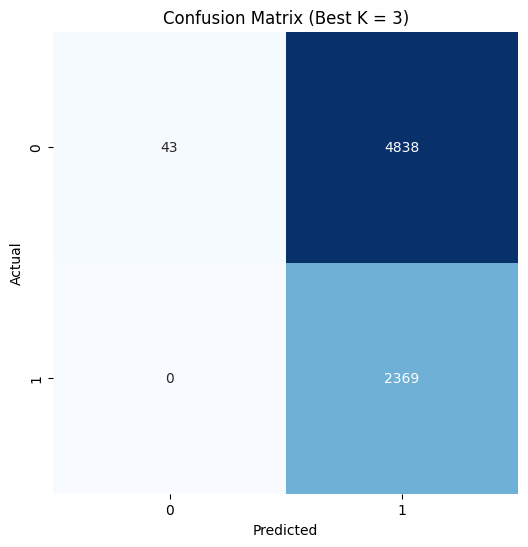

In [25]:
# Initialize variables to store the best model
best_k = 2
best_accuracy = 0
best_knn = None

# List to store accuraacies for plotting
accuracy_list = []

# Loop through different k values (e.g., from 2 to 20)

for k in range(2, 21):
# Initialize KNN
      # Initialize KNN with the current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(scaled_X_train, y_train)

    # Predict on the test data
    y_pred = knn.predict(scaled_X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

    # Update the best model if the current one is better

    if accuracy > best_accuracy:
      best_k = k
      best_accuracy = accuracy
      best_knn = knn

# Print the best k and its accuracy
print(f"Best K: {best_k}")
print(f"Best Test Accuracy: {best_accuracy:.2f}")

# Confusion matrix of the best model
y_pred_best = best_knn.predict(X_test)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Classification report of the best model
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# F1 score of the best model
f1_knn = f1_score(y_test, y_pred, average='weighted')

# Plot the confusion matrix of the best model
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix (Best K = {best_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### SVM

Test Accuracy for SVM: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      4881
           1       0.74      0.57      0.64      2369

    accuracy                           0.79      7250
   macro avg       0.77      0.73      0.75      7250
weighted avg       0.79      0.79      0.78      7250



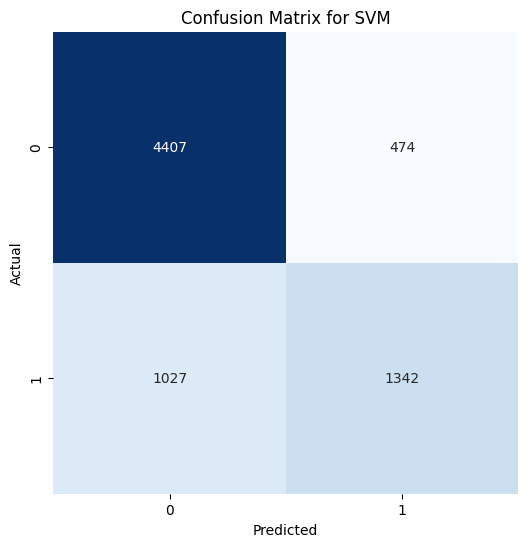

In [26]:
# Initialize SVM
svm = SVC(kernel='linear', probability=True)

# Train the model
svm.fit(scaled_X_train, y_train)

# Predict on the test data
y_pred = svm.predict(scaled_X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy for SVM: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# F1 score
f1_svm = f1_score(y_test, y_pred, average='weighted')

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Decision Tree

Test Accuracy for Decision Tree: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      4881
           1       0.78      0.79      0.79      2369

    accuracy                           0.86      7250
   macro avg       0.84      0.84      0.84      7250
weighted avg       0.86      0.86      0.86      7250



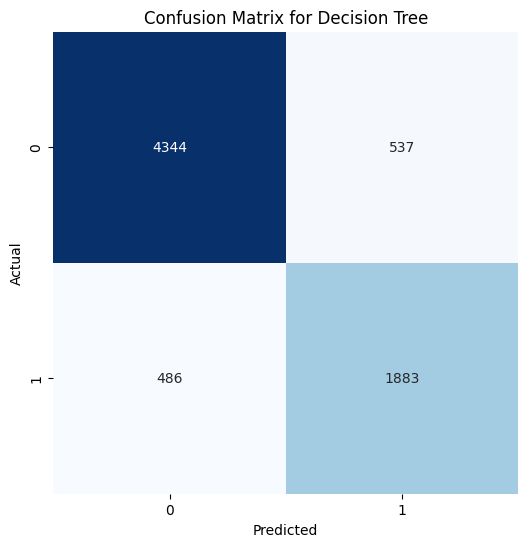

In [27]:
# Initialize Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(scaled_X_train, y_train)

# Predict on the test data
y_pred = decision_tree.predict(scaled_X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy for Decision Tree: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# F1 score
f1_dt = f1_score(y_test, y_pred, average='weighted')

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Random Forest

Test Accuracy for Random Forest: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      4881
           1       0.86      0.80      0.83      2369

    accuracy                           0.89      7250
   macro avg       0.89      0.87      0.88      7250
weighted avg       0.89      0.89      0.89      7250



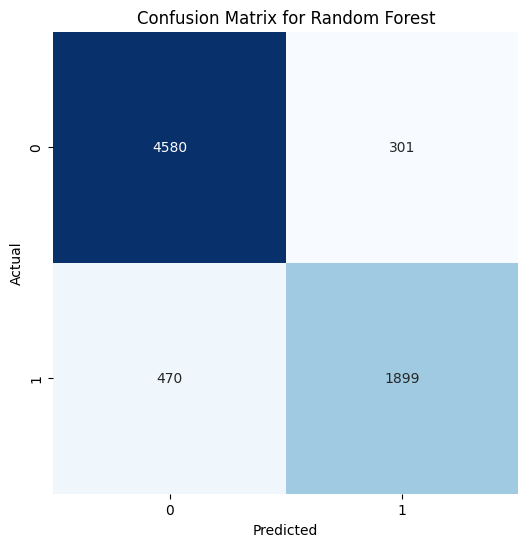

In [28]:
# Initialize Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(scaled_X_train, y_train)

# Predict on the test data
y_pred_rf = random_forest.predict(scaled_X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Test Accuracy for Random Forest: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Classification report
class_report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", class_report)

# F1 score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Gradient Boosting

Test Accuracy for Gradient Boosting: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      4881
           1       0.83      0.69      0.76      2369

    accuracy                           0.85      7250
   macro avg       0.85      0.81      0.83      7250
weighted avg       0.85      0.85      0.85      7250



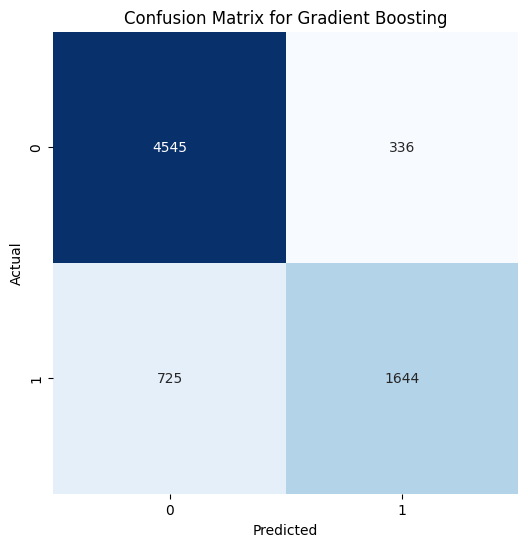

In [29]:
# Initialize Gradient Boosting
gbm = GradientBoostingClassifier(random_state=42)

# Train the model
gbm.fit(scaled_X_train, y_train)

# Predict on the test data
y_pred = gbm.predict(scaled_X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy for Gradient Boosting: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# F1 score
f1_gbm = f1_score(y_test, y_pred, average='weighted')

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### XG Boosting

Test Accuracy for XG Boosting: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4881
           1       0.86      0.78      0.81      2369

    accuracy                           0.88      7250
   macro avg       0.88      0.86      0.87      7250
weighted avg       0.88      0.88      0.88      7250



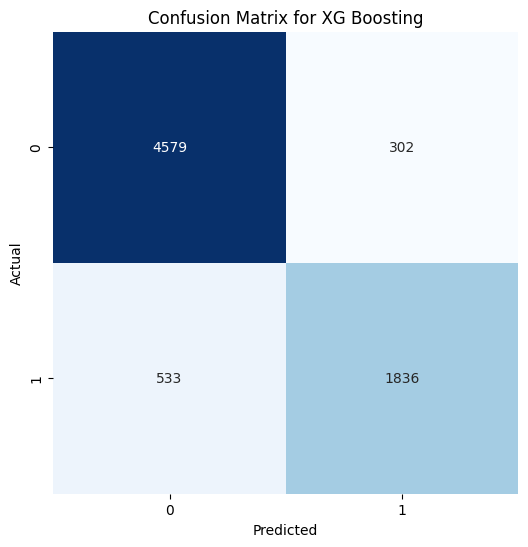

In [30]:
# Initialize XG Boosting
xgb = XGBClassifier(random_state=42)

# Train the model
xgb.fit(scaled_X_train, y_train)

# Predict on the test data
y_pred = xgb.predict(scaled_X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy for XG Boosting: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# F1 score
f1_xgb = f1_score(y_test, y_pred, average='weighted')

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for XG Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Logistic Regression

Test Accuracy for Logistic Regression: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.85      4881
           1       0.73      0.59      0.65      2369

    accuracy                           0.79      7250
   macro avg       0.77      0.74      0.75      7250
weighted avg       0.79      0.79      0.79      7250



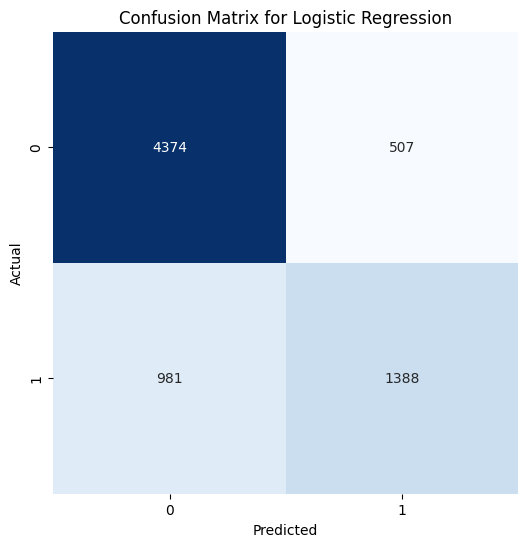

In [31]:
# Initialize Logistic Regression
logistic_regression = LogisticRegression(random_state=42, max_iter=400)

# Train the model
logistic_regression.fit(scaled_X_train, y_train)

# Predict on the test data
y_pred = logistic_regression.predict(scaled_X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy for Logistic Regression: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# F1 score
f1_lr = f1_score(y_test, y_pred, average='weighted')

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Naive Bayes

Test Accuracy for Logistic Regression: 0.42
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.14      0.25      4881
           1       0.36      0.98      0.52      2369

    accuracy                           0.42      7250
   macro avg       0.65      0.56      0.39      7250
weighted avg       0.76      0.42      0.34      7250



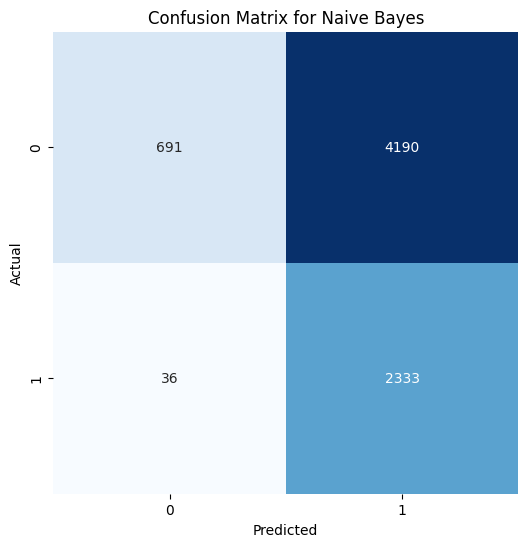

In [32]:
# Initialize Logistic Regression
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(scaled_X_train, y_train)

# Predict on the test data
y_pred = naive_bayes.predict(scaled_X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy for Logistic Regression: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# F1 score
f1_nv = f1_score(y_test, y_pred, average='weighted')

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [33]:
# Dictionary to store F1 scores for all models
model_f1_scores = {
    "Model": ["KNN",  "SVM", "Decision Tree", "Random Forest", "Gradient Boosting", "XG Boosting", "Logistic Regression", "Naive Bayes"],
    "F1 Score": [f1_knn, f1_svm, f1_dt, f1_rf, f1_gbm, f1_xgb, f1_lr, f1_nv]
}

# Create a DataFrame from the dictionary
f1_df = pd.DataFrame(model_f1_scores)

# Display the table
print(f1_df)

                 Model  F1 Score
0                  KNN  0.837585
1                  SVM  0.784837
2        Decision Tree  0.859277
3        Random Forest  0.892593
4    Gradient Boosting  0.849914
5          XG Boosting  0.883207
6  Logistic Regression  0.788103
7          Naive Bayes  0.337373


In [34]:
# Evaluate the model performance (Random Forest)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Store these metrics for Random Forest model
random_forest_performance = {
    "F1 Score": [f1_rf],
    "MAE": [mae_rf],
    "MSE": [mse_rf],
    "RMSE": [rmse_rf],
    "Accuracy": [accuracy_rf]
}

# Create a DataFrame for Random Forest model performance
random_performance_df = pd.DataFrame(random_forest_performance)

# Display Random Forest performance
print("Performance of Random Forest:")
print(random_performance_df)

Performance of Random Forest:
   F1 Score       MAE       MSE      RMSE  Accuracy
0  0.892593  0.106345  0.106345  0.326106  0.893655


#### Save the model

In [35]:
import joblib
from google.colab import files

joblib.dump(random_forest, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [36]:
# Download the CSV file
files.download('random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Optimization

## GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

# Create the base Random Forest model
rf_grid = RandomForestClassifier(random_state=42)

# Set the parameters to search over
param_grid_1 = {
    'n_estimators': [100],  # Number of trees  # 200
    'max_depth': [100],  # Depth of each tree  # 20
    'min_samples_split': [2],  # Minimum number of samples required to split a node   # 10
    'min_samples_leaf': [1],  # Minimum number of samples required at a leaf node   # 2
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False]  # Whether or not bootstrap samples are used
}

param_grid_2 = {
    'n_estimators': [100, 200, 500],  # Number of trees  # 200
    'max_depth': [100, 30, 20, None],  # Depth of each tree  # 20
    'min_samples_split': [2, 10, 20],  # Minimum number of samples required to split a node   # 10
    'min_samples_leaf': [1, 2, 5],  # Minimum number of samples required at a leaf node   # 2
    'max_features': ['sqrt'],  # Number of features to consider at each split
    'bootstrap': [True]  # Whether or not bootstrap samples are used
}

param_grid_3 = {
    'n_estimators': [400, 500, 600],  # Number of trees  # 200
    'max_depth': [25, 20, 15],  # Depth of each tree  # 20
    'min_samples_split': [1, 2],  # Minimum number of samples required to split a node   # 10
    'min_samples_leaf': [1],  # Minimum number of samples required at a leaf node   # 2
    'max_features': ['sqrt'],  # Number of features to consider at each split
    'bootstrap': [True]  # Whether or not bootstrap samples are used
}

In [38]:
import time

# Start the timer
start_time = time.time()

In [39]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid_3, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search model
grid_search.fit(scaled_X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model found by GridSearchCV to predict
best_rf_grid = grid_search.best_estimator_
y_pred = best_rf_grid.predict(scaled_X_test)

# Save the best model
joblib.dump(best_rf_grid, 'best_rf_grid_model.pkl')
print("Best Random Forest model (GridSearchCV) saved.")

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
27 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best parameters found:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best Random Forest model (GridSearchCV) saved.


In [40]:
# Best parameters from GridSearchCV (dictionary)
best_params = grid_search.best_params_

# Convert the dictionary to a DataFrame (transposed to have each parameter in a row)
best_df = pd.DataFrame.from_dict(best_params, orient='index', columns=['Best Value'])

# Display the DataFrame
print(best_df)

                  Best Value
bootstrap               True
max_depth                 20
max_features            sqrt
min_samples_leaf           1
min_samples_split          2
n_estimators             400


In [41]:
#  y_test: the actual target values -----  y_pred: the predicted values
# F1-score
f1_rf = f1_score(y_test, y_pred, average='weighted')

# Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse_rf)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred)

# Now you can store these metrics for each model
model_performance_metrics = {
    "F1 Score": [f1_rf],
    "MAE": [mae_rf],
    "MSE": [mse_rf],
    "RMSE": [rmse_rf],
    "Accuracy": [accuracy_rf]
}

# Create a DataFrame from the dictionary
performance_df = pd.DataFrame(model_performance_metrics)

# Display the table
print(performance_df)

   F1 Score       MAE       MSE      RMSE  Accuracy
0  0.893398  0.105379  0.105379  0.324622  0.894621


In [42]:
# End the timer
end_time = time.time()

# Calculate the time taken for grid search
elapsed_time = end_time - start_time
print(f"Grid search took {elapsed_time:.2f} seconds.")

Grid search took 299.33 seconds.


## RandomizedSearchCV

In [43]:
# Start the timer
start_time = time.time()

In [44]:
from sklearn.model_selection import RandomizedSearchCV

# Define the base Random Forest model
rf_random = RandomForestClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500, 600],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False],  # Whether or not bootstrap samples are used
}

In [45]:
# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    estimator=rf_random,
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try
    cv=3,  # Cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'  # Metric for evaluating performance
)

# Fit the RandomizedSearchCV model
random_search.fit(scaled_X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV: ", random_search.best_params_)

# Use the best model found by RandomizedSearchCV to predict
best_rf_random = random_search.best_estimator_
y_pred_random = best_rf_random.predict(scaled_X_test)

# Save the best RandomizedSearchCV model
joblib.dump(best_rf_random, 'best_rf_random_model.pkl')
print("Best Random Forest model (RandomizedSearchCV) saved.")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
99 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
99 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best parameters found by RandomizedSearchCV:  {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Best Random Forest model (RandomizedSearchCV) saved.


In [46]:
# Evaluate the model performance (RandomizedSearchCV)
f1_random = f1_score(y_test, y_pred_random, average='weighted')
mae_random = mean_absolute_error(y_test, y_pred_random)
mse_random = mean_squared_error(y_test, y_pred_random)
rmse_random = np.sqrt(mse_random)
accuracy_random = accuracy_score(y_test, y_pred_random)

# Store these metrics for RandomizedSearchCV model
random_search_performance = {
    "F1 Score": [f1_random],
    "MAE": [mae_random],
    "MSE": [mse_random],
    "RMSE": [rmse_random],
    "Accuracy": [accuracy_random]
}

# Create a DataFrame for RandomizedSearchCV model performance
random_performance_df = pd.DataFrame(random_search_performance)

# Display RandomizedSearchCV performance
print("Performance of RandomizedSearchCV:")
print(random_performance_df)

Performance of RandomizedSearchCV:
   F1 Score       MAE       MSE      RMSE  Accuracy
0  0.893747  0.104828  0.104828  0.323771  0.895172


In [47]:
# End the timer
end_time = time.time()

# Calculate the time taken for random search
elapsed_time = end_time - start_time
print(f"Random search took {elapsed_time:.2f} seconds.")

Random search took 1512.86 seconds.


### GridSearchCV vs RandomizedSearchCV

In [48]:
print("\nPerformance Comparison:")
comparison_df = pd.concat([performance_df, random_performance_df], axis=0)
comparison_df.index = ['GridSearchCV', 'RandomizedSearchCV']
print(comparison_df)


Performance Comparison:
                    F1 Score       MAE       MSE      RMSE  Accuracy
GridSearchCV        0.893398  0.105379  0.105379  0.324622  0.894621
RandomizedSearchCV  0.893747  0.104828  0.104828  0.323771  0.895172


## Downloding

In [49]:
# Download the CSV file
files.download('best_rf_grid_model.pkl')

files.download('best_rf_random_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Feature Importance

## Random Forest built-in feature importance

In [50]:
# random_forest is my trained Random Forest model
importances = random_forest.feature_importances_

# Get Feature names
feature_names = X_train.columns

# Create a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
7,lead time,0.353800
12,average price,0.194039
13,special requests,0.096486
14,arrival_month,0.089666
8,market segment type,0.056329
16,total_nights,0.047529
3,number of week nights,0.041737
2,number of weekend nights,0.032184
4,type of meal,0.019047
6,room type,0.017139


### Visualize Feature Importances

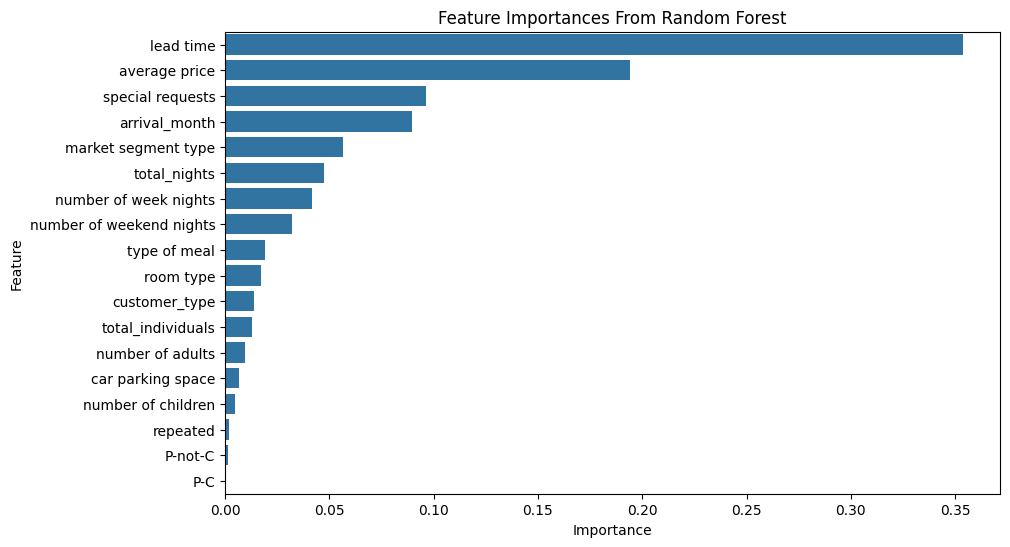

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances From Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### RF + important features

In [52]:
from sklearn.feature_selection import SelectFromModel

# Using the model reached via GridSearchCV
best_rf_grid.fit(scaled_X_train, y_train)

# Use SelectFromModel to automatically select important features
selector = SelectFromModel(best_rf_grid, threshold=0.02)  # Adjusting threshold
X_train_selected = selector.transform(scaled_X_train)
X_test_selected = selector.transform(scaled_X_test)

# Retrain the model using only selected features
best_rf_grid.fit(X_train_selected, y_train)
y_pred_selected = best_rf_grid.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_selected)
print(f"Accuracy with selected features: {accuracy}")

Accuracy with selected features: 0.8947586206896552


In [53]:
# Evaluate the model performance (with only the selected important features)
f1_random_selected = f1_score(y_test, y_pred_selected, average='weighted')
mae_random_selected = mean_absolute_error(y_test, y_pred_selected)
mse_random_selected = mean_squared_error(y_test, y_pred_selected)
rmse_random_selected = np.sqrt(mse_random)
accuracy_random_selected = accuracy_score(y_test, y_pred_selected)

# Store these metrics for model with only the selected important features
selected_features_performance = {
    "F1 Score": [f1_random_selected],
    "MAE": [mae_random_selected],
    "MSE": [mse_random_selected],
    "RMSE": [rmse_random_selected],
    "Accuracy": [accuracy_random_selected]
}

# Create a DataFrame for model performance (with only the selected important features)
selected_performance_df = pd.DataFrame(selected_features_performance)

# Display performance (with only the selected important features)
print("Performance of with selected important features:")
print(selected_performance_df)

Performance of with selected important features:
   F1 Score       MAE       MSE      RMSE  Accuracy
0  0.893735  0.105241  0.105241  0.323771  0.894759


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      4881
           1       0.86      0.80      0.83      2369

    accuracy                           0.89      7250
   macro avg       0.89      0.87      0.88      7250
weighted avg       0.89      0.89      0.89      7250



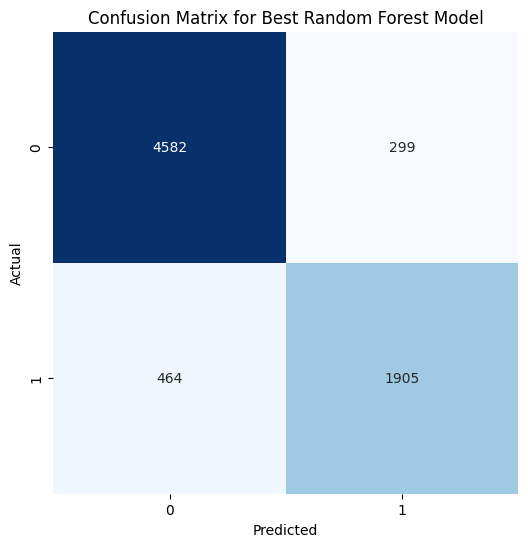

In [54]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_selected)

# Classification report
class_report = classification_report(y_test, y_pred_selected)
print("Classification Report:\n", class_report)

# F1 score
f1_rf = f1_score(y_test, y_pred_selected, average='weighted')

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Best Random Forest Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()